In [1]:
import pandas as pd
import numpy as np
df= pd.read_csv('train.csv')
df.head(4)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.


In [2]:
df.isnull().sum(axis=0)

Formatted Date                0
Summary                       0
Precip Type                 143
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Cloud Cover                   0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [3]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars)
count,94268.000000,94268.000000,94268.000000,94268.000000,94268.000000,94268.000000,94268.0,94268.000000
mean,11.949454,10.872365,0.733875,10.838893,187.707907,10.355367,0.0,1002.864099
std,9.601178,10.752540,0.196034,6.950710,107.652333,4.172897,0.0,118.290080
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.527778,2.244444,0.600000,5.796000,114.000000,8.372000,0.0,1011.800000
50%,12.077778,12.077778,0.780000,10.014200,180.000000,10.046400,0.0,1016.330000
75%,18.866667,18.866667,0.890000,14.151900,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


**Removing Null records**
> we do not want to impute values to precip type column. I thas only 500+null records and its very low compared to the data records count.

In [4]:
df = df.dropna(how='any',axis=0) 

In [5]:
df.isnull().sum(axis=0)

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Cloud Cover                 0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [6]:
df.iloc[:,1].value_counts()

Partly Cloudy                          30964
Mostly Cloudy                          27192
Overcast                               16358
Clear                                  10630
Foggy                                   7083
Breezy and Overcast                      526
Breezy and Mostly Cloudy                 515
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Windy and Mostly Cloudy                   35
Breezy and Foggy                          35
Dry                                       34
Light Rain                                17
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Windy                                      8
Humid and Overcast                         7
Drizzle                                    5
Windy and 

In [7]:
#replacing the column values to fit into majority of the values.
df['Summary']=df['Summary'].replace(['Breezy and Overcast','Breezy and Mostly Cloudy','Breezy and Partly Cloudy','Breezy and Foggy'],'Breezy')
df['Summary']=df['Summary'].replace(['Dry and Partly Cloudy','Dry and Mostly Cloudy','Windy and Dry','Breezy and Dry'],'Dry')
df['Summary']=df['Summary'].replace(['Windy and Partly Cloudy','Windy and Overcast','Windy and Mostly Cloudy','Windy and Foggy','Dangerously Windy and Partly Cloudy'],'Windy')
df['Summary']=df['Summary'].replace(['Light Rain','Drizzle'],'Rain')
df['Summary']=df['Summary'].replace(['Humid and Mostly Cloudy','Humid and Partly Cloudy','Humid and Overcast'],'Humid')

In [8]:
df.iloc[:,1].value_counts()

Partly Cloudy    30964
Mostly Cloudy    27192
Overcast         16358
Clear            10630
Foggy             7083
Breezy            1516
Windy              160
Dry                136
Humid               64
Rain                22
Name: Summary, dtype: int64

In [9]:
#We can categorize the column and create dummy variables. But I am tranferring the column values into a numeric values inorder to avoid more number of columns.
#There is a risk involved in this method. If we get more data, we have to make sure Summary column is mapped to the repective numeric calues. If new value occurs we have to create a new numeric value and re fit the data into the model.

summary_dict={'Partly Cloudy':0,
'Mostly Cloudy':1,
'Overcast':2,
'Clear':3,
'Foggy':4,
'Breezy':5,
'Windy':6,
'Dry':7,
'Rain':8,
'Humid':9}



In [10]:
df.shape[0]

94125

In [11]:
df=df.replace({"Summary": summary_dict})
df.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,0,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,0,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,1,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,0,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,1,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [12]:
#Handling Categorical variable
#drop_first=True will avoid dummy variable trap
cols_to_transform = [ 'Precip Type']
df_with_dummies = pd.get_dummies(df,columns = cols_to_transform,drop_first=True)
df=df_with_dummies



In [13]:
df.head(3)

,Formatted Date,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Daily Summary,Precip Type_snow
0,2006-04-01 00:00:00.000 +0200,0,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.,0
1,2006-04-01 01:00:00.000 +0200,0,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.,0
2,2006-04-01 02:00:00.000 +0200,1,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.,0


In [14]:
df[['Date','Hour','Dummy']]=df['Formatted Date'].str.split(" ",expand=True) 
#2006-04-01 00:

In [15]:
df.drop('Dummy',axis=1,inplace=True)


In [16]:
df['Hour']=df['Hour'].str.split(':').str[0]

In [17]:
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(dt.datetime.toordinal)

In [18]:
#df.drop('Date_1',axis=1,inplace=True)
df.head(2)

,Formatted Date,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Daily Summary,Precip Type_snow,Date,Hour
0,2006-04-01 00:00:00.000 +0200,0,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.,0,732402,00
1,2006-04-01 01:00:00.000 +0200,0,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.,0,732402,01


In [19]:
df.drop('Formatted Date',axis=1,inplace=True)
df.head(2)

,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Daily Summary,Precip Type_snow,Date,Hour
0,0,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.,0,732402,00
1,0,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.,0,732402,01


In [20]:
df.iloc[:,9].value_counts()

Mostly cloudy throughout the day.                                                 19464
Partly cloudy throughout the day.                                                  9546
Partly cloudy until night.                                                         6049
Partly cloudy starting in the morning.                                             5057
Foggy in the morning.                                                              4153
                                                                                  ...  
Foggy starting overnight continuing until morning and breezy in the afternoon.       23
Partly cloudy until night and breezy in the afternoon.                               22
Light rain in the morning and afternoon.                                             20
Light rain until morning.                                                            19
Light rain in the morning.                                                           11
Name: Daily Summary, Length: 207

In [21]:
df.iloc[:,9].nunique()

207

In [22]:
def change_category_to_number(DailySummaryCat):
    if DailySummaryCat=='Partly cloudy throughout the day.':
        return 1
    elif DailySummaryCat=='Mostly cloudy throughout the day.':
        return 2
    elif DailySummaryCat=='Foggy in the evening.':
        return 3
    elif DailySummaryCat=='Foggy overnight and breezy in the morning.':
        return 4
    elif DailySummaryCat=='Overcast throughout the day.':
        return 5
    elif DailySummaryCat=='Partly cloudy until night.':
        return 6
    elif DailySummaryCat=='Motly cloudy until night.':
        return 7
    elif DailySummaryCat=='Foggy starting overnight continuing until morning.':
        return 8
    elif DailySummaryCat=='Foggy in the morning.':
        return 9
    elif DailySummaryCat=='Partly cloudy until evening.':
        return 10
    elif DailySummaryCat=='Partly cloudy starting in the morning.':
        return 11
    elif DailySummaryCat=='Mostly cloudy starting overnight continuing until night.':
        return 12
    elif DailySummaryCat=='Partly cloudy starting in the afternoon.':
        return 13
    elif DailySummaryCat=='Partly cloudy starting overnight.':
        return 14
    elif DailySummaryCat=='Mostly cloudy starting overnight.':
        return 15
    elif DailySummaryCat=='Mostly cloudy until night and breezy in the afternoon.':
        return 16
    elif DailySummaryCat=='Mostly cloudy until evening.':
        return 17
    elif DailySummaryCat=='Foggy throughout the day.':
        return 18
    elif DailySummaryCat=='Partly cloudy starting in the morning.':
        return 19
    elif DailySummaryCat=='Partly cloudy starting in the morning continuing until evening.':
        return 20
    elif DailySummaryCat=='Foggy until morning.':
        return 21
    elif DailySummaryCat=='Partly cloudy starting in the morning continuing until night.':
        return 22
    elif DailySummaryCat=='Mostly cloudy starting in the morning.':
        return 23
    elif DailySummaryCat=='Foggy starting in the evening.':
        return 24
    elif DailySummaryCat=='Partly cloudy starting in the afternoon continuing until evening.':
        return 25
    elif DailySummaryCat=='Foggy overnight.':
        return 26
    elif DailySummaryCat=='Clear throughout the day.':
        return 27
    elif DailySummaryCat=='Partly cloudy starting overnight continuing until night.':
        return 28
    elif DailySummaryCat=='Partly cloudy overnight.':
        return 29
    elif DailySummaryCat=='Partly cloudy starting overnight continuing until evening.':
        return 30
    elif DailySummaryCat=='Foggy until night.':
        return 31
    elif DailySummaryCat=='Partly cloudy in the morning.':
        return 32
    elif DailySummaryCat=='Foggy starting overnight continuing until afternoon.':
        return 33
    elif DailySummaryCat=='Foggy until afternoon.':
        return 34
    elif DailySummaryCat=='Breezy and mostly cloudy overnight.':
        return 35
    elif DailySummaryCat=='Partly cloudy overnight and breezy starting in the morning continuing until afternoon.':
        return 36
    elif DailySummaryCat=='Breezy in the morning and foggy in the evening.':
        return 37
    elif DailySummaryCat=='Mostly cloudy until evening and breezy in the evening.':
        return 38
    elif DailySummaryCat=='Mostly cloudy starting in the evening.':
        return 39
    elif DailySummaryCat=='Mostly cloudy throughout the day and breezy starting overnight continuing until afternoon.':
        return 40
    elif DailySummaryCat=='Breezy starting in the morning continuing until night.':
        return 41
    elif DailySummaryCat=='Overcast throughout the day and breezy starting overnight continuing until morning.':
        return 42
    elif DailySummaryCat=='Breezy starting overnight continuing until morning and foggy in the evening.':
        return 43
    elif DailySummaryCat=='Light rain until morning.':
        return 44
    elif DailySummaryCat=='Mostly cloudy until night and breezy starting in the afternoon continuing until night.':
        return 45
    elif DailySummaryCat=='Mostly cloudy starting in the morning continuing until afternoon.':
        return 46
    elif DailySummaryCat=='Breezy until afternoon and overcast throughout the day.':
        return 47
    elif DailySummaryCat=='Partly cloudy until evening and breezy in the afternoon.':
        return 48
    elif DailySummaryCat=='Breezy starting overnight continuing until morning and partly cloudy starting overnight continuing until evening.':
        return 49
    elif DailySummaryCat=='Light rain starting overnight.':
        return 50
    elif DailySummaryCat=='Partly cloudy starting overnight continuing until evening and breezy starting in the morning continuing until evening.':
        return 51
    elif DailySummaryCat=='Foggy starting in the morning continuing until evening and breezy in the evening.':
        return 52
    elif DailySummaryCat=='Partly cloudy throughout the day and breezy in the afternoon.':
        return 53
    elif DailySummaryCat=='Mostly cloudy starting overnight continuing until evening and breezy starting overnight continuing until morning.':
        return 54
    elif DailySummaryCat=='Partly cloudy starting overnight continuing until evening and breezy in the morning.':
        return 55
    elif DailySummaryCat=='Overcast throughout the day and breezy overnight.':
        return 56
    elif DailySummaryCat=='Light rain in the morning.':
        return 57
    elif DailySummaryCat=='Rain until morning.':
        return 58
    elif DailySummaryCat=='Breezy in the morning and mostly cloudy starting in the evening.':
        return 59
    elif DailySummaryCat=='Mostly cloudy starting in the morning and breezy overnight.':
        return 60
    elif DailySummaryCat=='Partly cloudy starting overnight and breezy starting in the morning continuing until afternoon.':
        return 61
    elif DailySummaryCat=='Partly cloudy starting in the morning and breezy starting in the afternoon continuing until evening.':
        return 62
    elif DailySummaryCat=='Partly cloudy starting in the morning continuing until evening and breezy in the afternoon.':
        return 63
    elif DailySummaryCat=='Foggy starting overnight continuing until morning and breezy in the afternoon.':
        return 64


In [23]:
# assign a numerical value to the categorical field of class, by using the above function
df['DailySummaryCat'] = df['Daily Summary'].apply(change_category_to_number)


In [24]:
df.isnull().sum(axis=0)

Summary                         0
Temperature (C)                 0
Apparent Temperature (C)        0
Humidity                        0
Wind Speed (km/h)               0
Wind Bearing (degrees)          0
Visibility (km)                 0
Cloud Cover                     0
Pressure (millibars)            0
Daily Summary                   0
Precip Type_snow                0
Date                            0
Hour                            0
DailySummaryCat             14794
dtype: int64

In [25]:
# Let us remove the null values to ignore less contributing data.
df = df.dropna(how='any',axis=0) 
df.isnull().sum(axis=0)

Summary                     0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Cloud Cover                 0
Pressure (millibars)        0
Daily Summary               0
Precip Type_snow            0
Date                        0
Hour                        0
DailySummaryCat             0
dtype: int64

In [26]:
df.drop('Daily Summary',axis=1,inplace=True)
df.head(2)

C:\Users\SIMRAN\anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Precip Type_snow,Date,Hour,DailySummaryCat
0,0,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,0,732402,00,1.0
1,0,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,0,732402,01,1.0


In [27]:
df.shape

(79331, 13)

In [28]:
df = df.apply(pd.to_numeric)
df.head(2)

,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Precip Type_snow,Date,Hour,DailySummaryCat
0,0,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,0,732402,0,1.0
1,0,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,0,732402,1,1.0


In [29]:
df.rename(columns={'Temperature (C)': 'Temparature','Apparent Temperature (C)':'ApparentTemperature','Wind Speed (km/h)':'WindSpeed','Wind Bearing (degrees)':'WindBearing','Visibility (km)':'Visibility','Pressure (millibars)':'Pressure','Precip Type_snow':'PrecipTypeSnow'}, inplace=True)
df.head(2)

,Summary,Temparature,ApparentTemperature,Humidity,WindSpeed,WindBearing,Visibility,Cloud Cover,Pressure,PrecipTypeSnow,Date,Hour,DailySummaryCat
0,0,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,0,732402,0,1.0
1,0,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,0,732402,1,1.0


In [30]:
df.rename(columns={'Loud Cover': 'LoudCover'}, inplace=True)
df.head(2)

,Summary,Temparature,ApparentTemperature,Humidity,WindSpeed,WindBearing,Visibility,Cloud Cover,Pressure,PrecipTypeSnow,Date,Hour,DailySummaryCat
0,0,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,0,732402,0,1.0
1,0,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,0,732402,1,1.0


**Getting train test data**

In [31]:
from sklearn.model_selection import train_test_split

X = df[df.loc[:, df.columns != 'DailySummaryCat'].columns]
y = df['DailySummaryCat']

In [32]:
X.head(3)

,Summary,Temparature,ApparentTemperature,Humidity,WindSpeed,WindBearing,Visibility,Cloud Cover,Pressure,PrecipTypeSnow,Date,Hour
0,0,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,0,732402,0
1,0,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,0,732402,1
2,1,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,0,732402,2


In [33]:
y.shape

(79331,)

**Feature Selection - Finding important features using different methods**

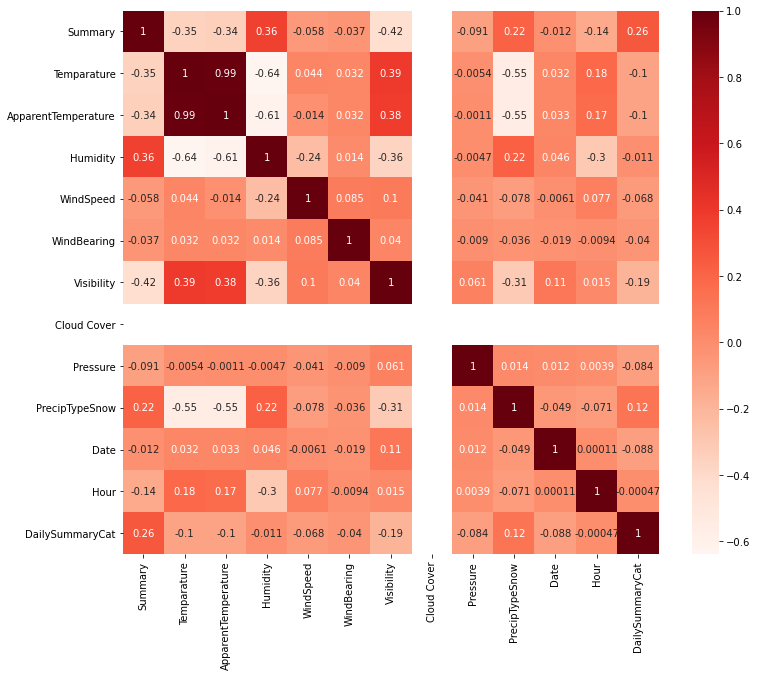

In [34]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

#Using Pearson correlation method

#The correlation coefficient has values between -1 to 1
#— A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
#— A value closer to 1 implies stronger positive correlation
#— A value closer to -1 implies stronger negative correlation

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [36]:
#Since LoudCover is 0 across all rows we will drop that column and re run heat map.

df.drop('Cloud Cover',axis=1,inplace=True)
df.head(2)

,Summary,Temparature,ApparentTemperature,Humidity,WindSpeed,WindBearing,Visibility,Pressure,PrecipTypeSnow,Date,Hour,DailySummaryCat
0,0,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,0,732402,0,1.0
1,0,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,0,732402,1,1.0


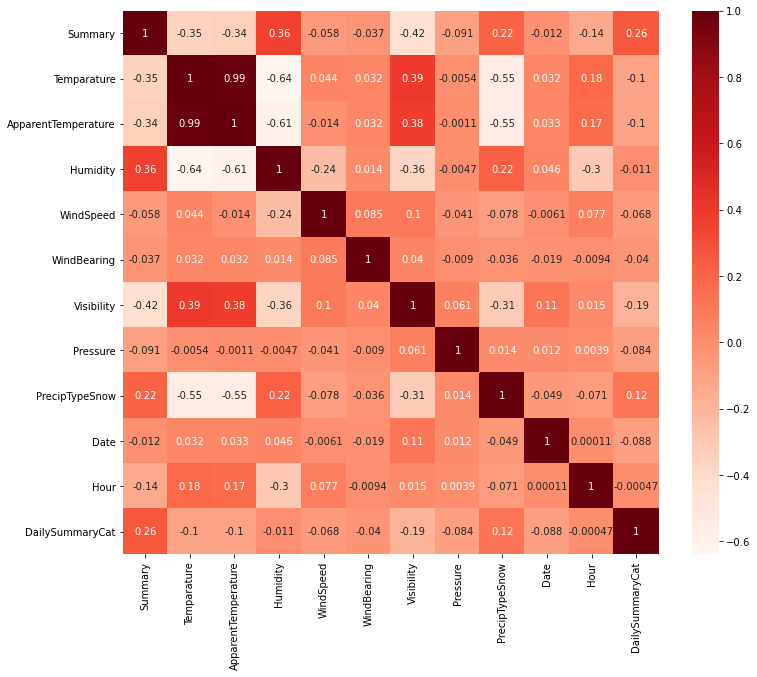

In [37]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [38]:
cor["DailySummaryCat"]

Summary                0.260529
Temparature           -0.101848
ApparentTemperature   -0.103543
Humidity              -0.011311
WindSpeed             -0.068050
WindBearing           -0.040198
Visibility            -0.191770
Pressure              -0.084050
PrecipTypeSnow         0.124739
Date                  -0.087761
Hour                  -0.000468
DailySummaryCat        1.000000
Name: DailySummaryCat, dtype: float64

In [39]:
#Correlation with output variable
#Usually we should take 0.05 as the benchmark. But to increase more number of features in input set, we added the bencmark to 0.1
cor_target = abs(cor["DailySummaryCat"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

Summary                0.260529
Temparature            0.101848
ApparentTemperature    0.103543
Visibility             0.191770
PrecipTypeSnow         0.124739
DailySummaryCat        1.000000
Name: DailySummaryCat, dtype: float64

In [ ]:
#print(df[["Summary","Visibility"]].corr())


In [ ]:
#print(df[["PrecipTypeSnow","Summary"]].corr())

In [40]:
df.head(2)

,Summary,Temparature,ApparentTemperature,Humidity,WindSpeed,WindBearing,Visibility,Pressure,PrecipTypeSnow,Date,Hour,DailySummaryCat
0,0,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,0,732402,0,1.0
1,0,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,0,732402,1,1.0


In [41]:
from sklearn.model_selection import train_test_split
X_pearson=df.iloc[:,[0,6,8]] #'Summary','Visibility','PrecipTypeSnow']
#X = df[df.loc[:, df.columns != ['DailySummaryCat','Temparature','ApparentTemperature','Humidity','WindSpeed','WindBearing','Pressure','Date','Hour']].columns]
y_pearson = df['DailySummaryCat']

In [42]:
X_pearson.head(3)

,Summary,Visibility,PrecipTypeSnow
0,0,15.8263,0
1,0,15.8263,0
2,1,14.9569,0


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pearson, y_pearson, test_size=0.25, random_state=128)

**Applying normalization**

In [44]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_train_scaled = sc_X.fit_transform(X_train.values)
X_test_scaled = sc_X.fit_transform(X_test.values)


In [45]:
X_train_scaled.shape

(59498, 3)

In [47]:
y_train.shape

(59498,)

**Training with Decision Tree Classifier**

In [48]:

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


In [49]:
Classifer = DecisionTreeClassifier(max_leaf_nodes=15,random_state=0)

In [50]:
Classifer.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_leaf_nodes=15, random_state=0)

In [51]:
prediction = Classifer.predict(X_test_scaled)

In [52]:
accuracy_score(y_true=y_test, y_pred=prediction)

0.3144254525286139

**Applying logistic regression**

In [53]:
lrClassifier = LogisticRegression()
lrClassifier.fit(X_train_scaled,y_train)
prediction = lrClassifier.predict(X_test_scaled)
accuracy_score(y_true=y_test, y_pred=prediction)

C:\Users\SIMRAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.28104674028134924

**Still the same score compared to using all the fields. But the run time and efficiency in completing the model was quicker. we were able to minimize the usage of resources**

Finding the best features using recursive feature elimination

In [54]:
X = df[df.loc[:, df.columns != 'DailySummaryCat'].columns]
y = df['DailySummaryCat']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=128)

In [56]:
X_train_scaled = sc_X.fit_transform(X_train.values)
X_test_scaled = sc_X.fit_transform(X_test.values)

In [57]:
model = LogisticRegression()
#Initializing RFE model
rfe = RFE(model, 7)   # 7 is chosen at random. But practically we should iterate across all the columns to get best fit features. (Refer - https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X_train_scaled,y_train)  
#Fitting the data to model
model.fit(X_rfe,y_train)


C:\Users\SIMRAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\SIMRAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SIMRAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.


KeyboardInterrupt: 

In [ ]:
print(rfe.support_)


In [ ]:
print(rfe.ranking_)

In [ ]:
cols = list(X_train.columns)
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

In [ ]:
X_test

In [ ]:
X_test=X_test.iloc[:,[1,2,3,4,5,6,9]]
X_test.head(2)

In [ ]:
X_test_scaled = sc_X.fit_transform(X_test.values)

In [ ]:
prediction = model.predict(X_test_scaled)
accuracy_score(y_true=y_test, y_pred=prediction)

*Accuracy was increased a little using RFE method compared to pearson method.*

**Finally we will aslo try Lasso regularization to choose the ebst features**

In [58]:
X = df[df.loc[:, df.columns != 'DailySummaryCat'].columns]
y = df['DailySummaryCat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=128)
X_train_scaled = sc_X.fit_transform(X_train.values)
X_test_scaled = sc_X.fit_transform(X_test.values)

In [59]:
#If the feature is irrelevant, lasso penalizes it’s coefficient and make it 0. Hence the features with coefficient = 0 are removed and the rest are taken.
reg = LassoCV()
reg.fit(X_train_scaled, y_train)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_train_scaled, y_train))


Best alpha using built-in LassoCV: 0.002527
Best score using built-in LassoCV: 0.117407


In [60]:
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 11 variables and eliminated the other 0 variables


*Lasso picked all the variables. Here it is inefficient*

Text(0.5, 1.0, 'Feature importance using Lasso Model')

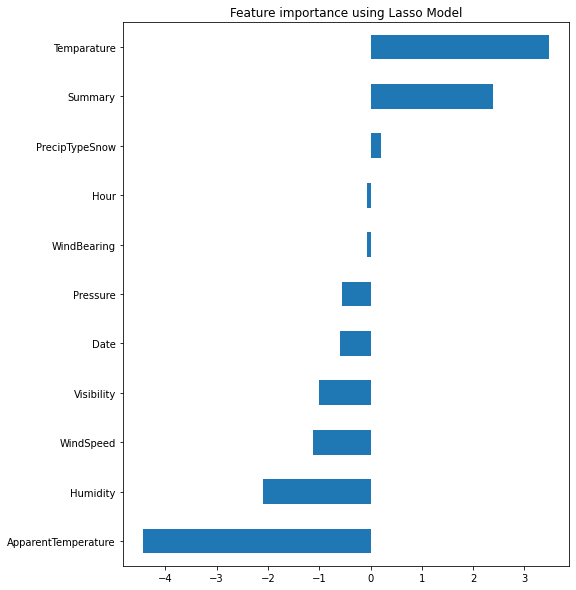

In [61]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

**Implementing Artificial Neural Network for the calssification prediction**

In [62]:
df.head(3)

,Summary,Temparature,ApparentTemperature,Humidity,WindSpeed,WindBearing,Visibility,Pressure,PrecipTypeSnow,Date,Hour,DailySummaryCat
0,0,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,0,732402,0,1.0
1,0,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,0,732402,1,1.0
2,1,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,0,732402,2,1.0


In [63]:
# we will predict orecip type snow column to keep our model simple.
df['PrecipTypeSnow'].unique()

array([0, 1], dtype=uint8)

In [64]:
#Let us find the important features requied using pearson correlation coefficient method
cor["PrecipTypeSnow"]

Summary                0.218849
Temparature           -0.549884
ApparentTemperature   -0.553555
Humidity               0.224799
WindSpeed             -0.078337
WindBearing           -0.036212
Visibility            -0.305950
Pressure               0.014441
PrecipTypeSnow         1.000000
Date                  -0.049227
Hour                  -0.070759
DailySummaryCat        0.124739
Name: PrecipTypeSnow, dtype: float64

In [66]:
cor_target = abs(cor["PrecipTypeSnow"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

Summary                0.218849
Temparature            0.549884
ApparentTemperature    0.553555
Humidity               0.224799
Visibility             0.305950
PrecipTypeSnow         1.000000
Name: PrecipTypeSnow, dtype: float64

In [67]:
df.head(3)

,Summary,Temparature,ApparentTemperature,Humidity,WindSpeed,WindBearing,Visibility,Pressure,PrecipTypeSnow,Date,Hour,DailySummaryCat
0,0,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,0,732402,0,1.0
1,0,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,0,732402,1,1.0
2,1,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,0,732402,2,1.0


In [68]:
X=df.iloc[:,[0,1,2,3,6]]
y=df['PrecipTypeSnow']
X.head(2)

,Summary,Temparature,ApparentTemperature,Humidity,Visibility
0,0,9.472222,7.388889,0.89,15.8263
1,0,9.355556,7.227778,0.86,15.8263


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=128)
X_train_scaled = sc_X.fit_transform(X_train.values)
X_test_scaled = sc_X.fit_transform(X_test.values)

**Building ANN model**

In [73]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(5, input_dim=5, activation='relu'))  # 5 input variables and 4 hidden layers
model.add(Dense(2, activation='relu')) # 2 second hidden layer
model.add(Dense(1, activation='sigmoid')) # 1 output layer since output node has one classifying variable

In [74]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [75]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
992/992 [==============================] - 4s 1ms/step - loss: 0.0000e+00 - accuracy: 0.9021
Epoch 2/100
992/992 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.9018
Epoch 3/100
992/992 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.9018
Epoch 4/100
992/992 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.9018
Epoch 5/100
992/992 [==============================] - 1s 967us/step - loss: 0.0000e+00 - accuracy: 0.9018
Epoch 6/100
992/992 [==============================] - 1s 955us/step - loss: 0.0000e+00 - accuracy: 0.9018
Epoch 7/100
992/992 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.9018
Epoch 8/100
992/992 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.9018
Epoch 9/100
992/992 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.9018
Epoch 10/100
992/992 [=============================

Epoch 78/100
992/992 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.9018
Epoch 79/100
992/992 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.9018
Epoch 80/100
992/992 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.9018
Epoch 81/100
992/992 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.9018
Epoch 82/100
992/992 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.9018
Epoch 83/100
992/992 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.9018
Epoch 84/100
992/992 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.9018
Epoch 85/100
992/992 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.9018
Epoch 86/100
992/992 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.9018
Epoch 87/100
992/992 [========================

In [76]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

KeyError: 0

In [77]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

ValueError: Found input variables with inconsistent numbers of samples: [15867, 0]

In [ ]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

In [ ]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss']) plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()